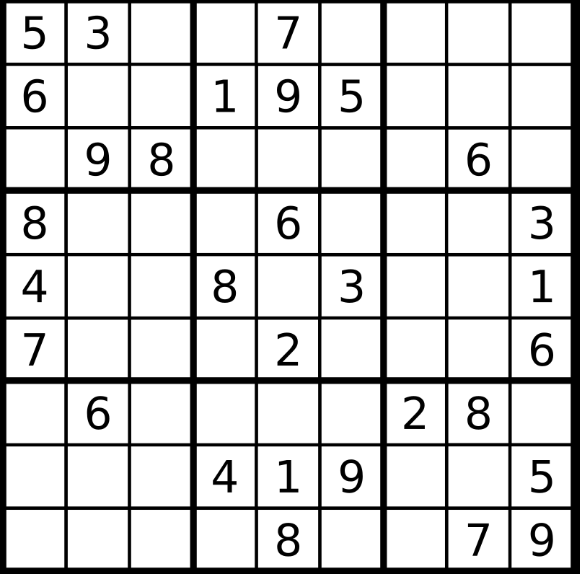

In [8]:
from pprint import pprint


def find_next_empty(puzzle):
    # encuentra la siguiente fila, col en el rompecabezas que aún no está lleno --> rep con -1
    # fila de retorno, tupla col (o (Ninguno, Ninguno) si no hay ninguno)
    # keep in mind that we are using 0-8 for our indices
    for r in range(9):
        for c in range(9): # range(9) is 0, 1, 2, ... 8
            if puzzle[r][c] == -1:
                return r, c

    return None, None  # si ningún espacio en el rompecabezas está vacío (-1)

def is_valid(puzzle, guess, row, col):
    # averigua si la suposición en la fila/columna del rompecabezas es una suposición válida
    # devuelve verdadero o falso

    
# para que una conjetura sea válida, debemos seguir las reglas del sudoku
    # ese número no debe repetirse en la fila, columna o cuadrado de 3x3 en el que aparece

    # comencemos con la fila
    row_vals = puzzle[row]
    if guess in row_vals:
        return False # si hemos repetido, ¡entonces nuestra suposición no es válida!

    # now the column
    # col_vals = []
    # for i in range(9):
    #     col_vals.append(puzzle[i][col])
    col_vals = [puzzle[i][col] for i in range(9)]
    if guess in col_vals:
        return False

    # y luego el cuadrado
    row_start = (row // 3) * 3 # 10 // 3 = 3, 5 // 3 = 1, 1 // 3 = 0
    col_start = (col // 3) * 3

    for r in range(row_start, row_start + 3):
        for c in range(col_start, col_start + 3):
            if puzzle[r][c] == guess:
                return False

    return True

def solve_sudoku(puzzle):
   # ¡Resuelve sudoku usando retroceso!
    # nuestro rompecabezas es una lista de listas, donde cada lista interna es una fila en nuestro sudoku
    # devolver si existe una solución
    # muta el rompecabezas para que sea la solución (si existe una solución)
    
    # paso 1: elige algún lugar del rompecabezas para adivinar
    row, col = find_next_empty(puzzle)

    # paso 1.1: si no queda nada, hemos terminado porque solo permitimos entradas válidas
    if row is None:  # esto es cierto si nuestra función find_next_empty devuelve Ninguno, Ninguno
        return True 
    
   # paso 2: si hay un lugar para poner un número, adivine entre 1 y 9
    for guess in range(1, 10): # range(1, 10) is 1, 2, 3, ... 9
        # paso 3: comprobar si se trata de una conjetura válida
        if is_valid(puzzle, guess, row, col):
            # paso 3.1: si esta es una suposición válida, colóquela en ese punto del rompecabezas
            puzzle[row][col] = guess
            # paso 4: ¡luego llamamos recursivamente a nuestro solucionador!
            if solve_sudoku(puzzle):
                return True
        
        # paso 5: no es válido o si nada se devuelve verdadero, entonces debemos retroceder e intentar con un nuevo número
        puzzle[row][col] = -1

    # paso 6: si ninguno de los números que probamos funciona, entonces este acertijo NO SE SOLUCIONA!
    return False

if __name__ == '__main__':
    example_board = [
        [3, 9, -1,   -1, 5, -1,   -1, -1, -1],
        [-1, -1, -1,   2, -1, -1,   -1, -1, 5],
        [-1, -1, -1,   7, 1, 9,   -1, 8, -1],

        [-1, 5, -1,   -1, 6, 8,   -1, -1, -1],
        [2, -1, 6,   -1, -1, 3,   -1, -1, -1],
        [-1, -1, -1,   -1, -1, -1,   -1, -1, 4],

        [5, -1, -1,   -1, -1, -1,   -1, -1, -1],
        [6, 7, -1,   1, -1, 5,   -1, 4, -1],
        [1, -1, 9,   -1, -1, -1,   2, -1, -1]
    ]
    print(solve_sudoku(example_board))
    pprint(example_board)

True
[[3, 9, 1, 8, 5, 6, 4, 2, 7],
 [8, 6, 7, 2, 3, 4, 9, 1, 5],
 [4, 2, 5, 7, 1, 9, 6, 8, 3],
 [7, 5, 4, 9, 6, 8, 1, 3, 2],
 [2, 1, 6, 4, 7, 3, 5, 9, 8],
 [9, 3, 8, 5, 2, 1, 7, 6, 4],
 [5, 4, 3, 6, 9, 2, 8, 7, 1],
 [6, 7, 2, 1, 8, 5, 3, 4, 9],
 [1, 8, 9, 3, 4, 7, 2, 5, 6]]
